# Predicting Netflix IMDB Scores


## Introduction to Problem & Data

#### Problem Statement:
Netflix stands out as one of the most powerful and successful streaming services in the current day, emassing hundreds of millions of users globally. For my final project, I aim to develop a predictive model capable of accurately estimating the IMDb scores of different movies on Netflix and analyzing the trends and patterns within these scores on the streaming platform. IMDb scores, ranked from 1 to 10, are a useful metric for measuring a given title's success and popularity with the general population. This model may be useful for content creators and producers who wish to decide which types of movies to invest in in order to maximize their IMDb score. These predictions will allow them to make informed financial decisions that optimize their resources, improving their overall scores and increasing their movie's likelihood for success. The successful development of a model will not only enhance predictive capabilities for IMDb scores but will also empower stakeholders in the entertainment industry with actionable insights. Content creators can align their productions with audience preferences and advertisers can target specific demographics effectively. Additionally, understanding the evolution of content quality will contribute to strategic planning and decision-making in the rapidly evolving streaming industry.

#### Dataset Description:

Data for this project is sourced from Kaggle in csv format, providing comprehensive information about various titles available on Netflix. It will require some cleaning and munging, given the presence of potentially unnecessary columns and null values within the dataset. Challenges may arise in constructing an accurate regression model due to the inherent volality of the data, since IMDb scores are based solely on viewer opinions, a subjective metric. However, I believe that certain predictive variables will be able to at least somewhat predict IMDb scores with some degree of accuracy.

This dataset contains comprehensive information about various titles available on Netflix and their IMDb scores, including type, age certification, runtime, and number of voters. It contains 5,283 rows of titles on the platform and 11 columns representing their different features and attributes, which I can use to help predict IMDb score.

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#load dataset
netflix_data = 'data/Netflix TV Shows and Movies.csv'
df = pd.read_csv(netflix_data)
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [ ]:
#drop rows with null/0 values & 'index' column
df = df.dropna()
df = df.drop(columns = 'index', axis = 1)
df = df[(df != 0).all(axis=1)]

In [ ]:
#filter to only include type movie
df = df[df['type'] == 'MOVIE']

In [ ]:
#final dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1318 entries, 0 to 5257
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1318 non-null   object 
 1   title              1318 non-null   object 
 2   type               1318 non-null   object 
 3   description        1318 non-null   object 
 4   release_year       1318 non-null   int64  
 5   age_certification  1318 non-null   object 
 6   runtime            1318 non-null   int64  
 7   imdb_id            1318 non-null   object 
 8   imdb_score         1318 non-null   float64
 9   imdb_votes         1318 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 113.3+ KB


In [ ]:
df['release_year'].min()

1964

In [ ]:
df['release_year'].max()

2022

In [ ]:
df['runtime'].min()

13

In [ ]:
df['runtime'].max()

229

In [ ]:
df['imdb_votes'].min()

5.0

In [ ]:
df['imdb_votes'].max()

2268288.0

The revised dataset that I will be working with contains information close to 1500 movies and TV shows on Netflix, released from 1964 to 2022. The movies range in length from 13 to 229 minutes, and have anywhere from 5 to over 2 million IMBD votes.

## Exploratory Data Analysis

In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0


#### Descriptive Statistics

In [ ]:
#mean IMDB score
df['imdb_score'].mean()

6.349468892261

In [ ]:
#median IMDB score
df['imdb_score'].median()

6.4

In [ ]:
#min score
df['imdb_score'].min()

2.0

In [ ]:
#max score
df['imdb_score'].max()

9.0

Text(0.5, 1.0, 'Boxplot of IMDb Scores')

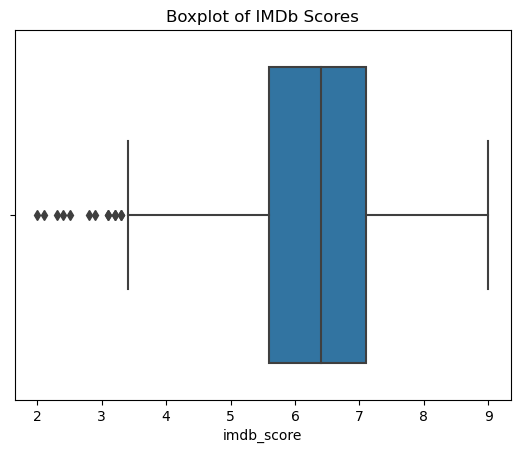

In [ ]:
#box & whisker plot of scores
sns.boxplot(data = df, x = 'imdb_score')
plt.title('Boxplot of IMDb Scores')

Text(0.5, 1.0, 'Distribution of IMDb Scores on Netflix')

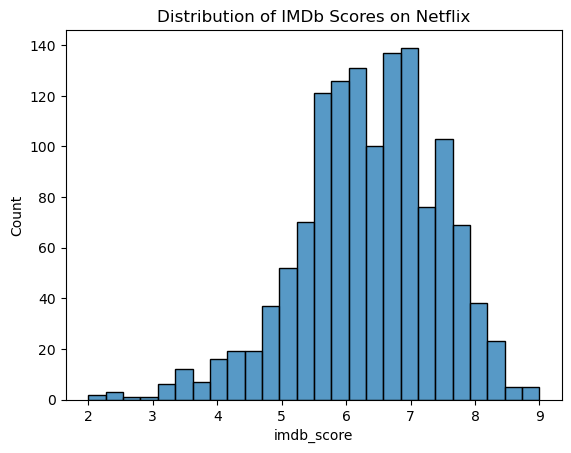

In [ ]:
#histogram of scores
sns.histplot(data = df, x = 'imdb_score')
plt.title('Distribution of IMDb Scores on Netflix')

Based on the above models and descriptive statistics, we see that the distribution of IMDb scores on Netflix is roughly normal, with a center between 6 and 7. However, scores range from a minimum of 2 to a maximum of 9 out of 10.

#### Initial Visualizations

Text(0.5, 1.0, 'Movie Release Year vs IMDb Score')

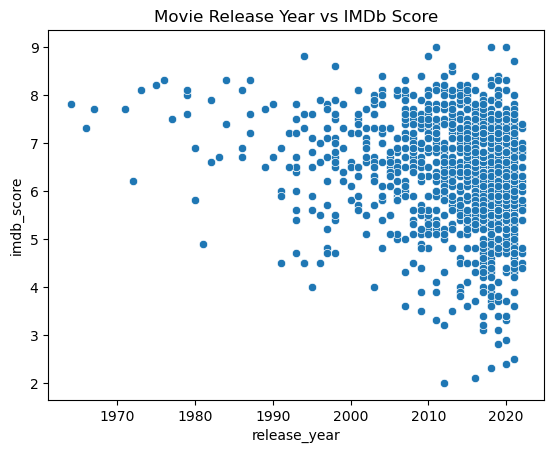

In [ ]:
#plot release year against imdb score
sns.scatterplot(data = df, x = 'release_year', y = 'imdb_score')
plt.title('Movie Release Year vs IMDb Score')

This scatterplot demonstrates the spread of Netfix's movies' release years compared to their respective IMDb scores. It shows how Netflix has many more recently released films compared to older movies. The older movies also seem to have higher scores in general compared to more recent releases, suggesting that Netflix is more willing to put more less popular movies on the platform, regardless of their rating, which may demonstrate a quantity over quality strategy for more recent movies.

Text(0.5, 1.0, 'IMDb Score by Age Rating')

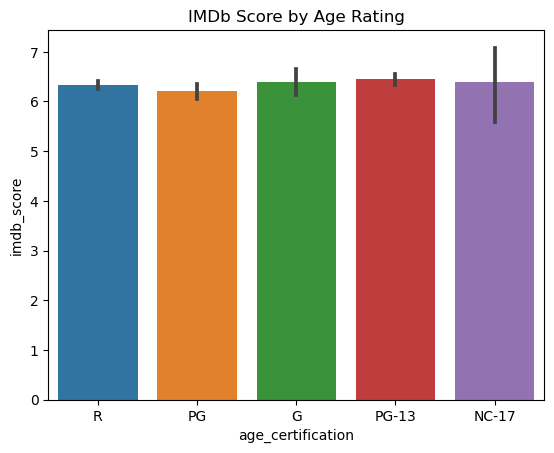

In [ ]:
#plot age rating against imdb score
sns.barplot(data = df, x = 'age_certification', y = 'imdb_score')
plt.title('IMDb Score by Age Rating')

The above barplot showcases the average IMDb scores of different age ratings for the movies. As illustrated above, all of the different age rating seem to have similar scores on average, and no one rating seems to contribute to a higher or lower IMDB score.

Text(0.5, 1.0, 'Runtime vs IMDb Score')

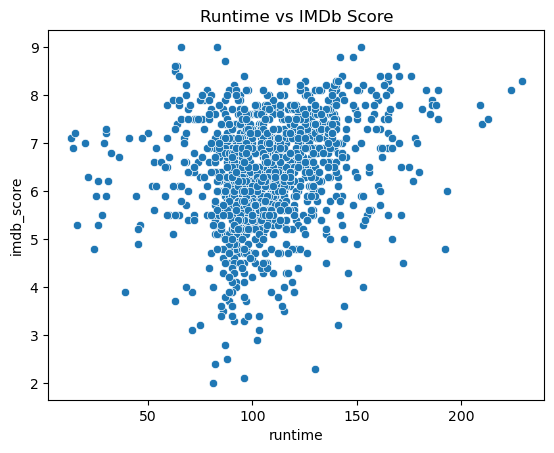

In [ ]:
#plot runtime against imdb score
sns.scatterplot(data = df, x = 'runtime', y = 'imdb_score')
plt.title('Runtime vs IMDb Score')

The scatterplot above illustrates the relationship between runtime and IMDb score. While there does not appear to be a major correlation, we are able to see how most movies are clustered in the 90-150 minute range for their runtimes.

Text(0.5, 1.0, 'IMDb Votes vs Score')

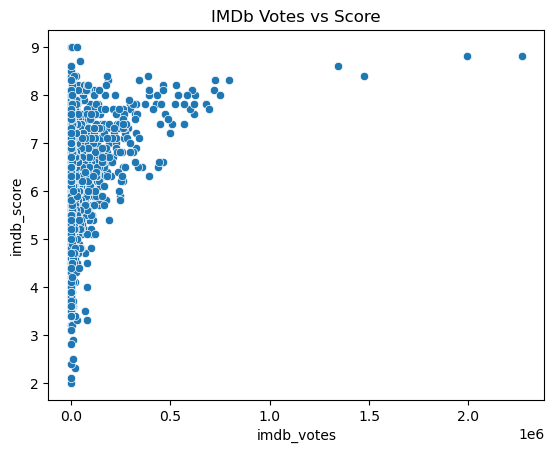

In [ ]:
#plot number of votes against imdb score
sns.scatterplot(data = df, x = 'imdb_votes', y = 'imdb_score')
plt.title('IMDb Votes vs Score')

This scatterplot compares the number of IMDb votes a film recieves to its overall IMDb score. While the films with fewer votes recieve scores accross the board, the movies with a higher number of votes all recieve relatively high scores.

## Modeling & Interpretations

To predict IMDb scores, I decided to use multiple different regression models and see which one performs the best in predicting these scores and accounting for the variation in my data and the fluctuations in score. For each of these models, I decided to utilize an 80-20 train-test split, training my model on 80% of the data and then testing it on the remaining 20%.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

#### Baseline Model

I evaluated the success of each of my models by comparing its performance metrics, such as the model's mean squared error, against this baseline's mean squared error. To get my baseline value, I simply took the mean IMDb score of my dataset.

In [ ]:
#set up baseline model using mean imbd score, calculate baseline mse
y = df['imdb_score']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

1.1803904614754042

#### Multiple Regression Model

I chose to build a multiple regression model because I wanted to use independent variables to predict the dependent variable, as I believed these predictors may have collectively influenced the IMDb score. Multiple linear regression allowed me to model the relationships between the score and each of these predictors while also considering their combined effect.

In [ ]:
#create X & y, split into training and testing data
X = df[['release_year', 'age_certification', 'runtime', 'imdb_votes']]
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#encode categorical column
cat_col = ['age_certification']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [ ]:
#fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['age_certification'])])),
                ('model', LinearRegression())])

In [ ]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__age_certification_NC-17,0.024133
onehotencoder__age_certification_PG,-0.286936
onehotencoder__age_certification_PG-13,-0.081993
onehotencoder__age_certification_R,-0.223004
remainder__release_year,-0.014331
remainder__runtime,0.007426
remainder__imdb_votes,0.000002


In [ ]:
#find y-int
lr.intercept_

34.48854937105635

In [ ]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

1.0087203049886788

In [ ]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

1.0337078091043608

In [ ]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
release_year,0.005642
age_certification,0.008976
runtime,0.023834
imdb_votes,0.095070


Overall, my multiple regression model performed better than my baseline. Both the training data and the testing data outperformed the baseline, with the training data performing slightly better than the testing data. I think this is because I was able to account for fluctuation within my data, utilizing the information present within the independent variables o make predictions. A multiple regression model could leverage the information contained in these features to make more nuanced predictions compared to the baseline, which only predicted the mean IMDb score.

The input that was most important in this scenario was the number of IMDb votes, followed by runtime. Release year and age rating were the least important for predicting the IMDb score in this model.

#### K-Nearest Neighbors Regression Model

I chose to try the k-nearest neighbors regression evaluation metric next because KNN makes predictions based on the similarity of instances in the feature space. If IMDb scores were influenced by local patterns or clusters of similar movies with comparable features, which occured in some of my initial visualizations of the data, KNN would be effective in capturing these localized relationships.

In [ ]:
#create X & y, split into training and testing data
X = df[['release_year', 'age_certification', 'runtime', 'imdb_votes']]
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#encode categorical column & scale data
cat_col = ['age_certification']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())

In [ ]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [ ]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [ ]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['age_certification'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
#determine best parameter
grid_search.best_params_

{'model__n_neighbors': 25}

In [ ]:
#use 25 neighbors in model
knn = grid_search.best_estimator_

In [ ]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.8968253206831119

In [ ]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.9828792727272726

In [ ]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
release_year,0.039070
age_certification,0.032467
runtime,0.141024
imdb_votes,0.150224


My KNN model performed better than both my baseline and my multiple regression model. While my training data performed slightly better than my testing data, my testing data still performed very well in comparison to my previous models. I think this was due to the fact that KNN models can capture non-linear patterns in the data, which might be present within the IMDb data. Additionally, using grid search for hyperparameter tuning within this model may have led to its better overall performance. By selecting the optimal number of neighbors to use, I was able to fine-tune the model for better results.

Once again, the most important features in this scenario were the number of IMDb votes and the runtime of the film. Release year and age certification were less important towards predicting these scores.

#### Decision Tree Regression Model

I also chose to build a decision tree regression model because like k-nearest neighbors, decision trees can capture non-linear relationships within the IMDb score data. In addition, they provide a clear and interpretable decision-making decision-making process, making it easy to understand how the model makes predictions based on the values of different features and providing insight into the factores influencing IMDb scores.

In [ ]:
#create X & y, split into training and testing data
X = df[['release_year', 'age_certification', 'runtime', 'imdb_votes']]
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#encode categorical column
cat_col = ['age_certification']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_col), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

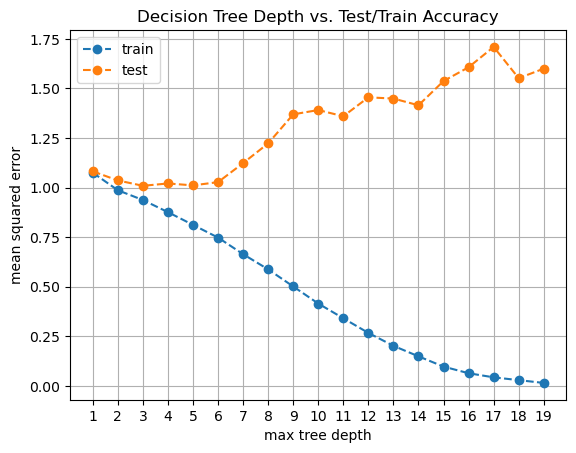

In [ ]:
#find the optimal max depth while avoiding overfitting by plotting the test accuracies & finding the minimum one
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [ ]:
#fit a decision tree model with a max depth = 3 (lowest mse test score on graph)
dtree = DecisionTreeRegressor(max_depth = 3).fit(X_train_encoded, y_train)

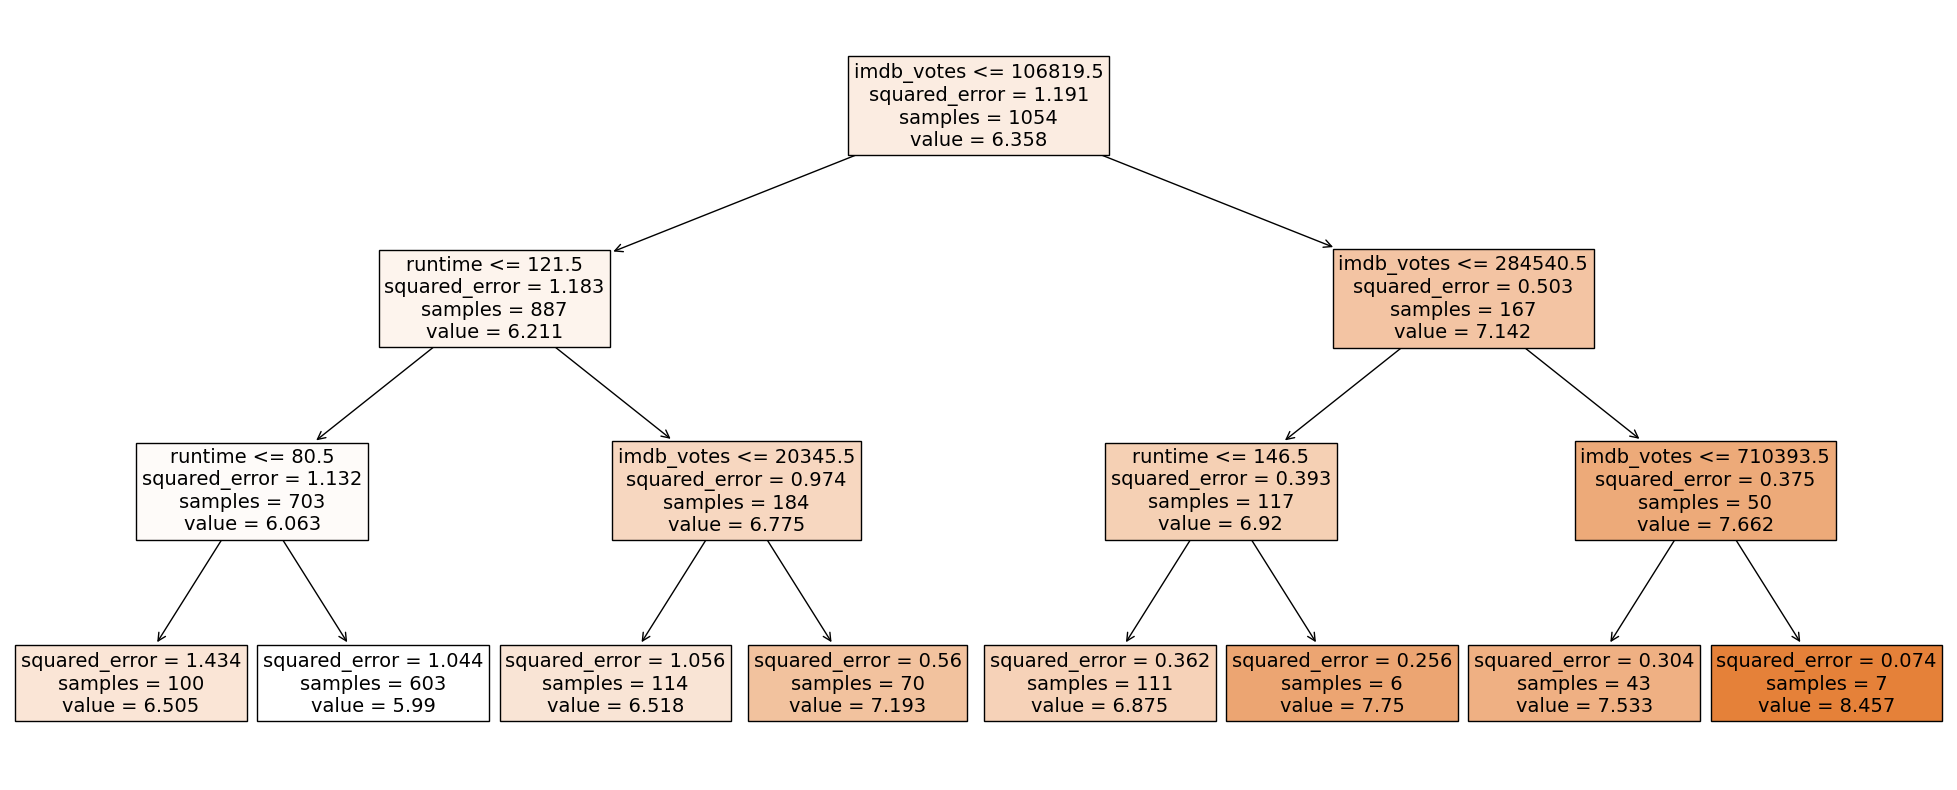

In [ ]:
#plot the tree
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14);

In [ ]:
#calculate mse for training data
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

0.9373144848823804

In [ ]:
#calculate mse for testing data
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

1.009137235784215

In [ ]:
#determine feature importance
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
age_certification_G,0.000000
age_certification_NC-17,0.000000
age_certification_PG,0.000000
age_certification_PG-13,0.000000
age_certification_R,0.000000
release_year,0.000000
runtime,0.151231
imdb_votes,0.190164


While my decision tree's training data outperformed my baseline and multiple linear regression, it performed slightly worse than my knn model. I believe that this may be because the selected max depth of 3 might not capture the complexity of any underlying data patterns as well as the knn model did. Because the max depth was so low, the tree only made decisions based on runtime and number of IMDb votes, discounting release year and age certification completely, which could've led to a worse performance.

Once again, the number of IMDb votes and runtime are the two most important features in predicting IMDb score. However, unlike the other models, this one did not even consider the other two features as significant at all, with the result of their permutation importance being 0.

#### Random Forest Regression Model

For my last model, I decided to extend my decision tree model into a random forest regression model. Since my single decision tree performed well, I wanted to explore ensemble methods like random forest for further improvement, since they combine multiple trees to improve predictive performance.

In [ ]:
#create X & y, split into training and testing data
X = df[['release_year', 'age_certification', 'runtime', 'imdb_votes']]
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#encode categorical column
cat_col = ['age_certification']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [ ]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [ ]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['age_certification'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 6, 'model__n_estimators': 200}

In [ ]:
#use max depth of 6 & 200 estimators in model
forest = grid_search.best_estimator_

In [ ]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.6897749629587194

In [ ]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.9624717356974481

In [ ]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
release_year,0.048094
age_certification,-0.002176
runtime,0.185315
imdb_votes,0.253723


Overall, my random forest model performed the best in comparison to all of the other models I developed. While there was a much larger disparity between my mean squared errors for my testing data compared to my training data, the testing data's mean squared error was the lowest out of all the models, which means it was the most successful in predicting IMDb score.

Once again, number of IMDb votes and runtime were the most significant inputs in helping determine IMDb score, and release year and age certification were the least. However, age certification was negative this time instead of positive, which was a key difference between this model and all the others.

## Next Steps & Discussion

#### Summary of Findings

In my analysis of IMDb scores, all the models I constructed demonstrated improved performance over the baseline predictor, signifying their utility and significance. The models ranked in terms of performance are as follows: Random Forest Regression, K-Nearest Neighbors Regression, Decision Tree Regression, and Multiple Linear Regression.

Key Findings:

1) Success of Random Forest Model:
The Random Forest model emerged as the most effective, showcasing the best predictive capabilities out of all the models. Its robust performance suggests its suitability for capturing complex relationships within the IMDb score data.

2) Impactful Features:
Notably, the number of IMDb votes and the runtime of movies proved to be pivotal in predicting IMDb scores across all models. These two features consistently demonstrated a significant influence on audience ratings.

3) Variable Influence:
While release year and age certification exhibited a comparatively lower impact on predicting IMDb scores, their relevance varied among different models. Despite being less influential, these features still contributed valuable insights to certain predictive models.

In conclusion, the ensemble nature of the Random Forest model, incorporating diverse decision trees, proved advantageous in capturing intricate patterns within the data. The emphasis on IMDb votes and runtime as influential features aligns with audience engagement and film duration as key contributors to perceived movie quality. The findings provide a nuanced understanding of feature importance and model performance, offering valuable insights for future analyses and predictive modeling in the realm of movie ratings.

#### Next Steps/Improvements

To enhance the predictive capabilities of the models and gain deeper insights into IMDb scores, I would want to incorporate these additional features into my models:

- Data about Production Costs:
    - I think it would be really interesting to explore the impact of production costs on IMDb scores and integrate data related to the expenses incurred during the production of movies to assess how budgetary factors contribute to audience perceptions of a film.

- Text Feature Extraction from Movie Titles/Descriptions:
    - I would like to leverage the information within the movie description column by applying text feature extraction techniques to analyze the relationship between keywords in movie titles/descriptions and IMDb scores.

- Producers and Production Details:
    - It would be interesting to incorporate data about the movie producers and details on where the films were produced and released. Understanding the influence of key individuals, production locations, and distribution strategies can contribute to a more comprehensive model.

- Financial Data:
    - Similar to production costs, I think that I could use financial data, such as total revenue and profits, to gain a holistic view of a movie's financial performance. Assessing the economic aspects alongside IMDb scores can offer a broader perspective on the success and impact of movies.

By integrating these additional factors into the analysis, I would be able to refine these models even more and obtain a more nuanced understanding of the multitude of factors that contribute to IMDb scores. This approach could potentially lead to more accurate predictions and actionable insights for filmmakers and industry stakeholders.